# 1. 라이브러리 및 패키지 불러오기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re  

# 2. 데이터 불러오기

In [2]:
#log_data = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/log_data.csv')

In [3]:
#relog = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/relog.csv')

In [4]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/user_spec.csv')

In [5]:
loan_result = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/loan_result.csv')

## 2-1. 데이터 확인하기

## 2) user_spec 데이터

In [6]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [7]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [8]:
respec = user_spec
respec['age'] = 2022 - respec['birth_year'] + 1

In [9]:
respec.loc[respec['age'] < 20, 'reage'] = 10
respec.loc[(respec['age'] >= 20) & (respec['age'] <30), 'reage'] = 20
respec.loc[(respec['age'] >= 30) & (respec['age'] <40), 'reage'] = 30
respec.loc[(respec['age'] >= 40) & (respec['age'] <50), 'reage'] = 40
respec.loc[(respec['age'] >= 50) & (respec['age'] <60), 'reage'] = 50
respec.loc[(respec['age'] >= 60) & (respec['age'] <70), 'reage'] = 60
respec.loc[(respec['age'] >= 70) & (respec['age'] <80), 'reage'] = 70
respec.loc[(respec['age'] >= 80) & (respec['age'] <90), 'reage'] = 80
respec.loc[respec['age'] >= 90, 'reage'] = 90

respec = respec[respec.columns.difference(['age','birth_year'])]

In [10]:
respec.head()

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
0,1249046,20151101.0,660.0,1000000.0,기타,162000000.0,4.0,1.0,자가,PRIVATEBUSINESS,2022-06-07 06:28:18,NaN,0.0,기타,30.0,118218,108000000.0
1,954900,20070201.0,870.0,30000000.0,정규직,27000000.0,1.0,1.0,기타가족소유,PRIVATEBUSINESS,2022-06-07 14:29:03,NaN,0.0,대환대출,50.0,553686,30000000.0
2,137274,20210901.0,710.0,10000000.0,기타,15000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-06-07 21:40:22,NaN,0.0,생활비,20.0,59516,30000000.0
3,1570936,20170101.0,820.0,2000000.0,정규직,344000000.0,7.0,1.0,자가,EARNEDINCOME,2022-06-07 09:40:27,NaN,0.0,생활비,30.0,167320,62000000.0
4,967833,20210901.0,630.0,5000000.0,정규직,16000000.0,1.0,1.0,기타가족소유,EARNEDINCOME,2022-06-07 08:55:07,0.0,0.0,생활비,20.0,33400,36000000.0


In [11]:
# 최연소 가입자는 15살
# 10대 중 연소득이 0인 사람도 있지만 6천만원이라고 적은 학생들이 있음.
# 10대의 대출 희망 금액 20억, 기대출수(1) but 기대출 금액 x => 어떤 값이 잘못된 것인가?
respec.sort_values(by='reage', ascending=True) 

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
767381,979055,NaN,NaN,120000000.0,기타,NaN,1.0,1.0,자가,OTHERINCOME,2022-06-29 11:30:29,NaN,0.0,생활비,10.0,778679,0.0
725651,590715,202201.0,NaN,200000000.0,기타,NaN,1.0,1.0,전월세,FREELANCER,2022-05-28 11:22:27,NaN,0.0,사업자금,10.0,806320,60000000.0
447307,1609096,NaN,700.0,0.0,기타,NaN,1.0,1.0,기타가족소유,OTHERINCOME,2022-06-30 12:21:54,NaN,0.0,생활비,10.0,258117,0.0
736565,467160,NaN,700.0,1000000.0,기타,NaN,1.0,1.0,기타가족소유,OTHERINCOME,2022-06-30 12:19:00,NaN,0.0,생활비,10.0,258117,0.0
1286713,1467823,202205.0,NaN,120000000.0,정규직,NaN,NaN,0.0,전월세,EARNEDINCOME,2022-05-01 11:33:21,NaN,0.0,전월세보증금,10.0,711327,55000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393578,1496444,202204.0,NaN,7000000.0,기타,NaN,NaN,NaN,전월세,FREELANCER,2022-04-27 01:07:48,0.0,0.0,생활비,NaN,239255,30000000.0
1393587,1824869,NaN,NaN,24000000.0,기타,NaN,NaN,NaN,전월세,OTHERINCOME,2022-04-27 13:40:54,NaN,0.0,대환대출,NaN,433763,24000000.0
1393649,471527,202202.0,520.0,12000000.0,정규직,15000000.0,5.0,NaN,기타가족소유,EARNEDINCOME,2022-04-27 00:47:58,NaN,0.0,생활비,NaN,397914,28000000.0
1393786,809359,NaN,880.0,10000000.0,기타,NaN,1.0,NaN,기타가족소유,OTHERINCOME,2022-04-18 23:15:37,NaN,NaN,생활비,NaN,570962,24000000.0


In [12]:
# 근로형태
# -> 입사연월, 한도조회 당시 유저 신용점수, 대출희망금액, 고용형태, 주거소유형태, 근로형태, 개인회생자 납입 완료 여부, 개인회생자여부, 대출목적, 연소득
respec[respec['income_type'].isnull()]

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
5353,129515,NaN,750.0,NaN,NaN,67000000.0,4.0,1.0,NaN,NaN,2022-06-13 18:26:44,NaN,NaN,NaN,40.0,135984,NaN
8864,1468193,NaN,810.0,NaN,NaN,6000000.0,2.0,1.0,NaN,NaN,2022-06-16 16:34:35,NaN,NaN,NaN,20.0,151012,NaN
17484,1234909,NaN,640.0,NaN,NaN,36000000.0,3.0,0.0,NaN,NaN,2022-06-16 16:28:10,NaN,NaN,NaN,20.0,596908,NaN
17552,1068316,NaN,770.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2022-06-16 16:28:59,NaN,NaN,NaN,40.0,142003,NaN
20510,2082836,NaN,940.0,NaN,NaN,61000000.0,3.0,1.0,NaN,NaN,2022-06-16 16:30:46,NaN,NaN,NaN,30.0,827892,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,NaN,650.0,NaN,NaN,6000000.0,1.0,1.0,NaN,NaN,2022-06-16 16:30:17,NaN,NaN,NaN,50.0,387671,NaN
1363322,657920,NaN,770.0,NaN,NaN,16000000.0,4.0,1.0,NaN,NaN,2022-06-16 16:31:02,NaN,NaN,NaN,20.0,839689,NaN
1367643,596953,NaN,630.0,NaN,NaN,1000000.0,1.0,1.0,NaN,NaN,2022-06-30 16:32:56,NaN,NaN,NaN,30.0,264147,NaN
1378239,999720,NaN,520.0,NaN,NaN,2000000.0,2.0,1.0,NaN,NaN,2022-03-12 21:49:37,NaN,NaN,NaN,50.0,738199,NaN


In [13]:
#loan_result[loan_result['application_id']==129515]
#loan_result[loan_result['application_id']==1468193]
#loan_result[loan_result['application_id']==1234909]

In [14]:
respec = respec.dropna(subset = ['income_type'])

In [15]:
# 연소득이 null 값인 컬럼의 사람 중 4명이 입사연월이 null 값, 근로형태가 OTHERINCOME
# 4명이 20대, 1명이 40대인데, 40대인 사람은 사업 준비 중이며 무직이라 해도 무방하다 생각함
respec[respec['yearly_income'].isnull()]

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
165422,1026915,NaN,NaN,5000000.0,기타,NaN,NaN,1.0,전월세,OTHERINCOME,2022-06-30 21:11:51,0.0,0.0,생활비,20.0,861363,NaN
233316,2045613,20220630.0,520.0,5000000.0,기타,1000000.0,1.0,1.0,전월세,FREELANCER,2022-06-30 18:37:04,0.0,0.0,전월세보증금,20.0,702899,NaN
597591,391560,NaN,590.0,20000000.0,기타,27000000.0,9.0,0.0,전월세,OTHERINCOME,2022-06-30 19:27:28,0.0,0.0,생활비,20.0,329226,NaN
597613,341149,NaN,930.0,6000000.0,기타,3000000.0,1.0,1.0,기타가족소유,OTHERINCOME,2022-06-30 21:32:18,0.0,0.0,사업자금,40.0,670502,NaN
971960,1330905,NaN,750.0,3000000.0,기타,3000000.0,1.0,1.0,자가,OTHERINCOME,2022-06-30 18:57:05,0.0,0.0,생활비,20.0,771592,NaN


In [16]:
# 4번쨰의 사람만 loan_result 데이터 셋에서의 값이 존재한다.
# 4번쨰 사람을 제외하고 4명의 사람은 join하는 과정에서 없어질 것임.
#loan_result[loan_result['application_id'] == 1026915]
#loan_result[loan_result['application_id'] == 2045613]
#loan_result[loan_result['application_id'] == 391560]
loan_result[loan_result['application_id'] == 341149]
#loan_result[loan_result['application_id'] == 1330905]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
4495392,341149,2022-06-30 21:32:20,64,254,45000000.0,10.3,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35000000.0,16.4,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5000000.0,19.5,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15000000.0,12.5,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10000000.0,9.1,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23000000.0,15.4,NaN


In [17]:
# 평균 연소득 3,621,104.90730 / 월 350만원 정도?
# 5개 컬럼의 null 값은 평균으로 채워도 될 것 같다고 생각했음.
respec['yearly_income'].mean()

43453258.887647174

In [18]:
respec['yearly_income'] = respec['yearly_income'].fillna(respec['yearly_income'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
respec.isnull().sum()

application_id                               0
company_enter_month                     171675
credit_score                            105112
desired_amount                               0
employment_type                              0
existing_loan_amt                       313752
existing_loan_cnt                       198540
gender                                   12959
houseown_type                                0
income_type                                  0
insert_time                                  0
personal_rehabilitation_complete_yn    1203269
personal_rehabilitation_yn              587376
purpose                                      0
reage                                    12959
user_id                                      0
yearly_income                                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


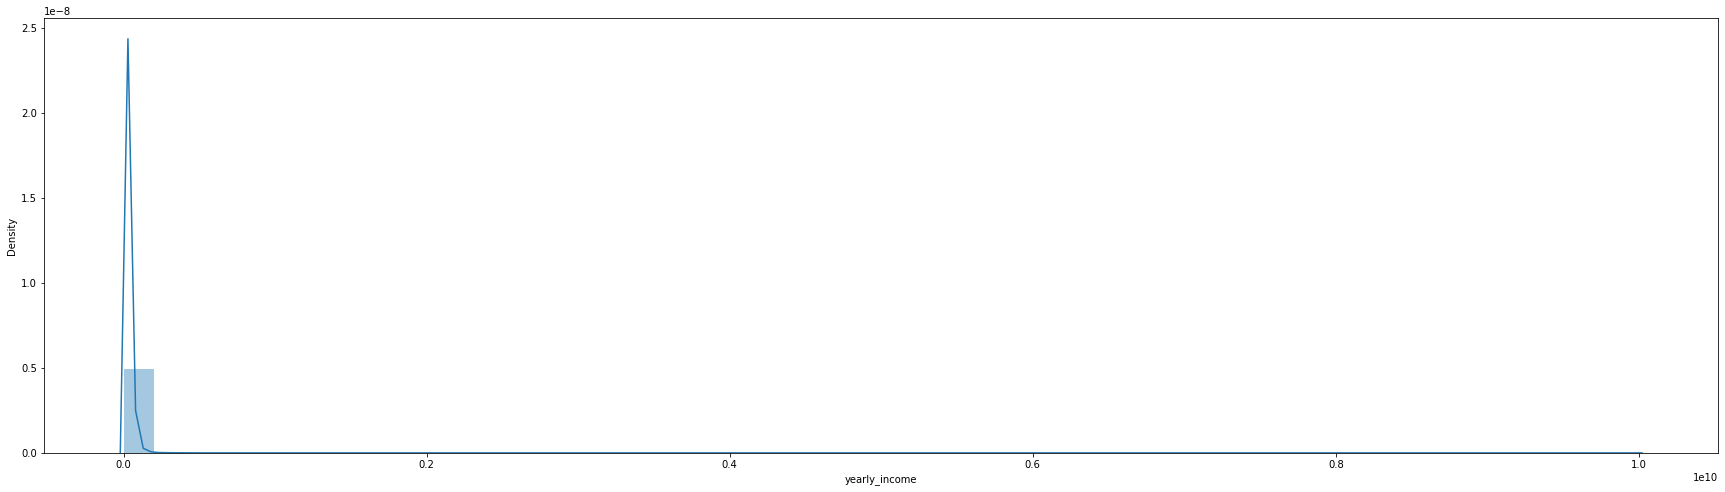

In [20]:
plt.figure(figsize=(30,8))
sns.distplot(respec['yearly_income'])
plt.show()

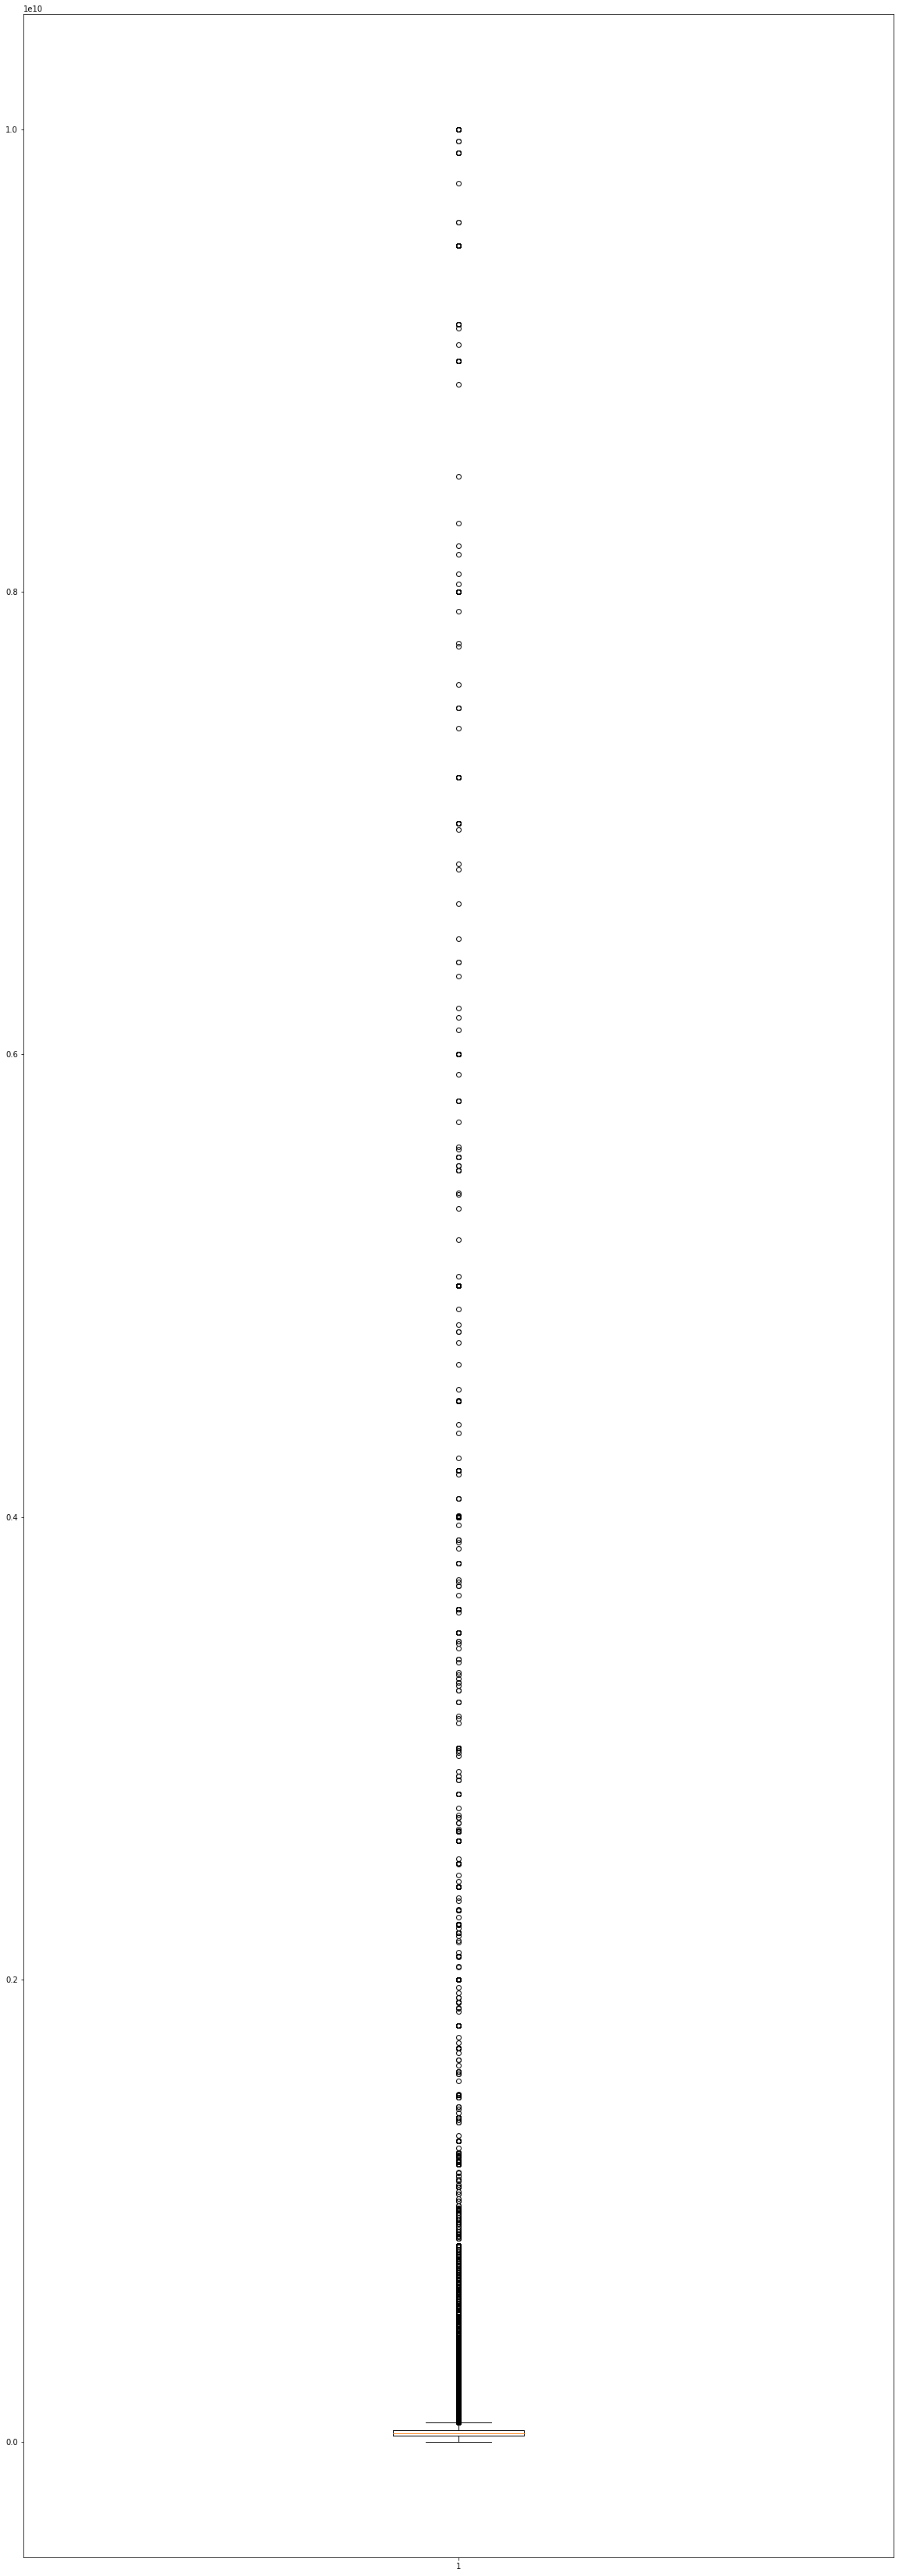

In [21]:
plt.figure(figsize=(20, 60))
plt.boxplot(respec['yearly_income'])
plt.show()

In [22]:
# 가장 많은 연소득 100억
respec.sort_values(by='yearly_income', ascending=False) 

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
34630,277856,200807.0,1000.0,1.000000e+10,정규직,NaN,NaN,0.0,자가,EARNEDINCOME,2022-03-30 11:07:59,NaN,NaN,생활비,40.0,169742,1.000000e+10
1106869,210966,NaN,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,OTHERINCOME,2022-05-06 16:52:16,NaN,0.0,사업자금,30.0,580362,1.000000e+10
257318,1585468,200807.0,1000.0,1.000000e+10,정규직,NaN,NaN,0.0,자가,EARNEDINCOME,2022-03-29 18:04:40,NaN,NaN,생활비,40.0,169742,1.000000e+10
386975,556402,201401.0,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-05-23 22:57:14,NaN,0.0,사업자금,30.0,580362,1.000000e+10
119274,1314852,201001.0,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-04-30 22:41:59,NaN,0.0,사업자금,30.0,580362,1.000000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646113,1684740,NaN,580.0,3.000000e+06,기타,23000000.0,6.0,0.0,기타가족소유,OTHERINCOME,2022-06-26 11:40:50,0.0,0.0,생활비,30.0,148079,0.000000e+00
1319270,1476472,NaN,620.0,1.000000e+07,기타,28000000.0,3.0,1.0,전월세,OTHERINCOME,2022-05-13 10:20:31,NaN,0.0,생활비,30.0,111290,0.000000e+00
593419,1848311,NaN,650.0,1.000000e+06,기타,NaN,NaN,0.0,기타가족소유,OTHERINCOME,2022-06-20 10:44:47,0.0,0.0,생활비,20.0,153513,0.000000e+00
1380931,1546415,NaN,620.0,7.000000e+06,기타,14000000.0,6.0,1.0,기타가족소유,OTHERINCOME,2022-05-07 11:32:20,0.0,0.0,대환대출,20.0,454369,0.000000e+00


In [23]:
respec[respec['yearly_income'] == 1.000000e+10]

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
34630,277856,200807.0,1000.0,1.000000e+10,정규직,NaN,NaN,0.0,자가,EARNEDINCOME,2022-03-30 11:07:59,NaN,NaN,생활비,40.0,169742,1.000000e+10
95315,819151,20170101.0,940.0,1.000000e+10,정규직,NaN,NaN,1.0,자가,EARNEDINCOME,2022-06-17 10:51:53,NaN,0.0,생활비,30.0,828388,1.000000e+10
119274,1314852,201001.0,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-04-30 22:41:59,NaN,0.0,사업자금,30.0,580362,1.000000e+10
257318,1585468,200807.0,1000.0,1.000000e+10,정규직,NaN,NaN,0.0,자가,EARNEDINCOME,2022-03-29 18:04:40,NaN,NaN,생활비,40.0,169742,1.000000e+10
363473,133864,201401.0,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-05-14 01:37:36,NaN,0.0,사업자금,30.0,580362,1.000000e+10
386975,556402,201401.0,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-05-23 22:57:14,NaN,0.0,사업자금,30.0,580362,1.000000e+10
1106869,210966,NaN,810.0,2.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,OTHERINCOME,2022-05-06 16:52:16,NaN,0.0,사업자금,30.0,580362,1.000000e+10
1116464,1799754,20140101.0,800.0,3.000000e+08,기타,20000000.0,5.0,1.0,기타가족소유,FREELANCER,2022-06-09 00:52:21,NaN,0.0,사업자금,30.0,580362,1.000000e+10
1179435,1336031,20210801.0,650.0,0.000000e+00,계약직,102000000.0,5.0,1.0,기타가족소유,EARNEDINCOME,2022-06-21 21:09:13,NaN,0.0,대환대출,30.0,781341,1.000000e+10


In [24]:
respec.isnull().sum()

application_id                               0
company_enter_month                     171675
credit_score                            105112
desired_amount                               0
employment_type                              0
existing_loan_amt                       313752
existing_loan_cnt                       198540
gender                                   12959
houseown_type                                0
income_type                                  0
insert_time                                  0
personal_rehabilitation_complete_yn    1203269
personal_rehabilitation_yn              587376
purpose                                      0
reage                                    12959
user_id                                      0
yearly_income                                0
dtype: int64

In [25]:
# reage
respec[respec['gender'].isnull()]

,application_id,company_enter_month,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,purpose,reage,user_id,yearly_income
253,132643,NaN,560.0,10000000.0,기타,45000000.0,5.0,NaN,기타가족소유,OTHERINCOME,2022-04-20 19:47:49,NaN,NaN,대환대출,NaN,49072,32000000.0
507,1093354,202107.0,540.0,5000000.0,계약직,NaN,NaN,NaN,기타가족소유,EARNEDINCOME2,2022-03-29 14:06:02,NaN,NaN,생활비,NaN,77317,6000000.0
891,954344,202005.0,950.0,20000000.0,정규직,NaN,NaN,NaN,기타가족소유,PRIVATEBUSINESS,2022-03-19 21:05:28,NaN,NaN,사업자금,NaN,364670,10000000.0
979,1082273,202103.0,NaN,20000000.0,정규직,NaN,NaN,NaN,전월세,EARNEDINCOME,2022-05-31 09:58:59,0.0,0.0,생활비,NaN,587345,15000000.0
1038,2100576,202109.0,740.0,40000000.0,정규직,NaN,NaN,NaN,기타가족소유,EARNEDINCOME,2022-03-29 16:44:04,NaN,NaN,기타,NaN,744785,34000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393578,1496444,202204.0,NaN,7000000.0,기타,NaN,NaN,NaN,전월세,FREELANCER,2022-04-27 01:07:48,0.0,0.0,생활비,NaN,239255,30000000.0
1393587,1824869,NaN,NaN,24000000.0,기타,NaN,NaN,NaN,전월세,OTHERINCOME,2022-04-27 13:40:54,NaN,0.0,대환대출,NaN,433763,24000000.0
1393649,471527,202202.0,520.0,12000000.0,정규직,15000000.0,5.0,NaN,기타가족소유,EARNEDINCOME,2022-04-27 00:47:58,NaN,0.0,생활비,NaN,397914,28000000.0
1393786,809359,NaN,880.0,10000000.0,기타,NaN,1.0,NaN,기타가족소유,OTHERINCOME,2022-04-18 23:15:37,NaN,NaN,생활비,NaN,570962,24000000.0


In [26]:
loan_result[loan_result['application_id'] == 1093354]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
3254057,1093354,2022-03-29 14:06:02,30,85,10000000.0,18.3,1.0


In [27]:
# 남성이 2배에 달함
respec['gender'].value_counts()

1.0    934267
0.0    446905
Name: gender, dtype: int64

In [28]:
# EARNEDINCOME: 직장가입자(4대보험O)
# EARNEDINCOME2: 직장가입자(4대보험X)
# PRIVATEBUSINESS: 개인사업자
#PRACTITIONER: 전문직
# FREELANCER: 프리랜서
# OTHERINCOME: 기타소득
respec['income_type'].unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER'], dtype=object)

In [29]:
respec['income_type'] = respec['income_type'].replace("PRIVATEBUSINESS", 1).replace("FREELANCER", 2).replace("EARNEDINCOME", 3).replace("OTHERINCOME", 4).replace("EARNEDINCOME2", 5).replace("PRACTITIONER", 6)

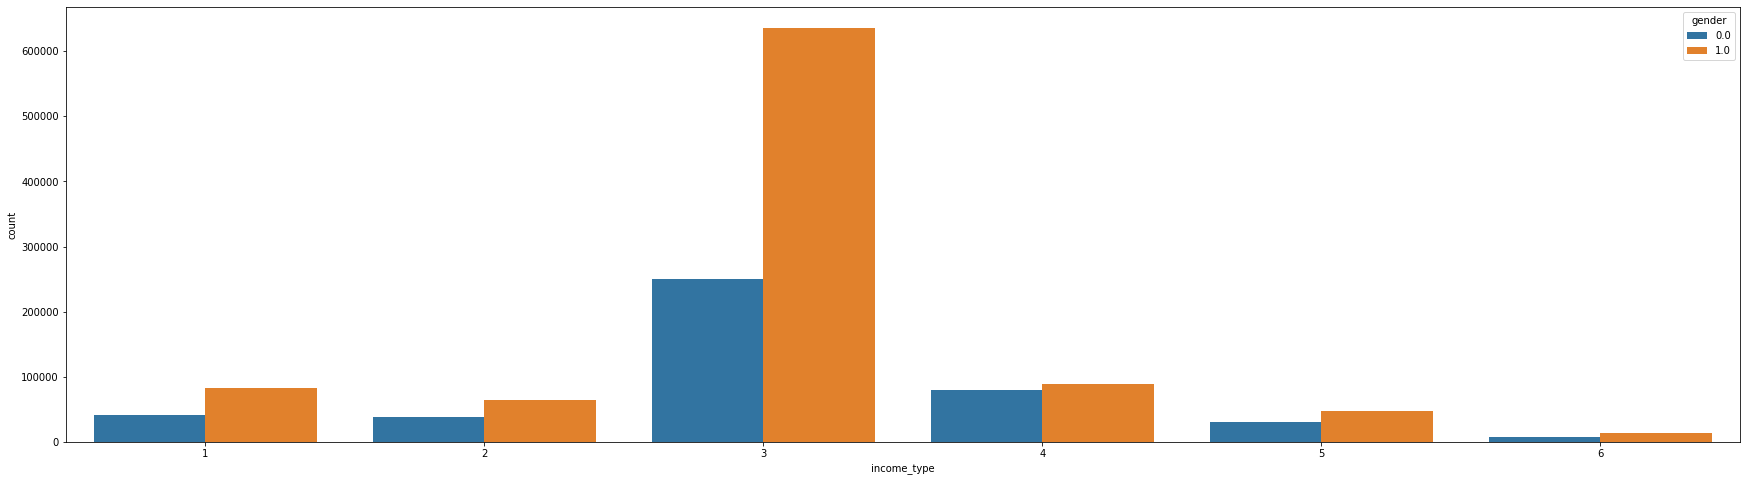

In [30]:
# 전체적으로 남성이 많지만, 특정 직업(개인 사업자)에 남성이 유독 많은 것을 확인
plt.figure(figsize=(30,8))
sns.countplot(x="income_type", hue="gender", data=respec)
plt.show()

In [31]:
# 결론적으로 gender의 null값은 남성으로 채움
respec['gender'] = respec['gender'].fillna(0)

In [32]:
respec.isnull().sum()

application_id                               0
company_enter_month                     171675
credit_score                            105112
desired_amount                               0
employment_type                              0
existing_loan_amt                       313752
existing_loan_cnt                       198540
gender                                       0
houseown_type                                0
income_type                                  0
insert_time                                  0
personal_rehabilitation_complete_yn    1203269
personal_rehabilitation_yn              587376
purpose                                      0
reage                                    12959
user_id                                      0
yearly_income                                0
dtype: int64

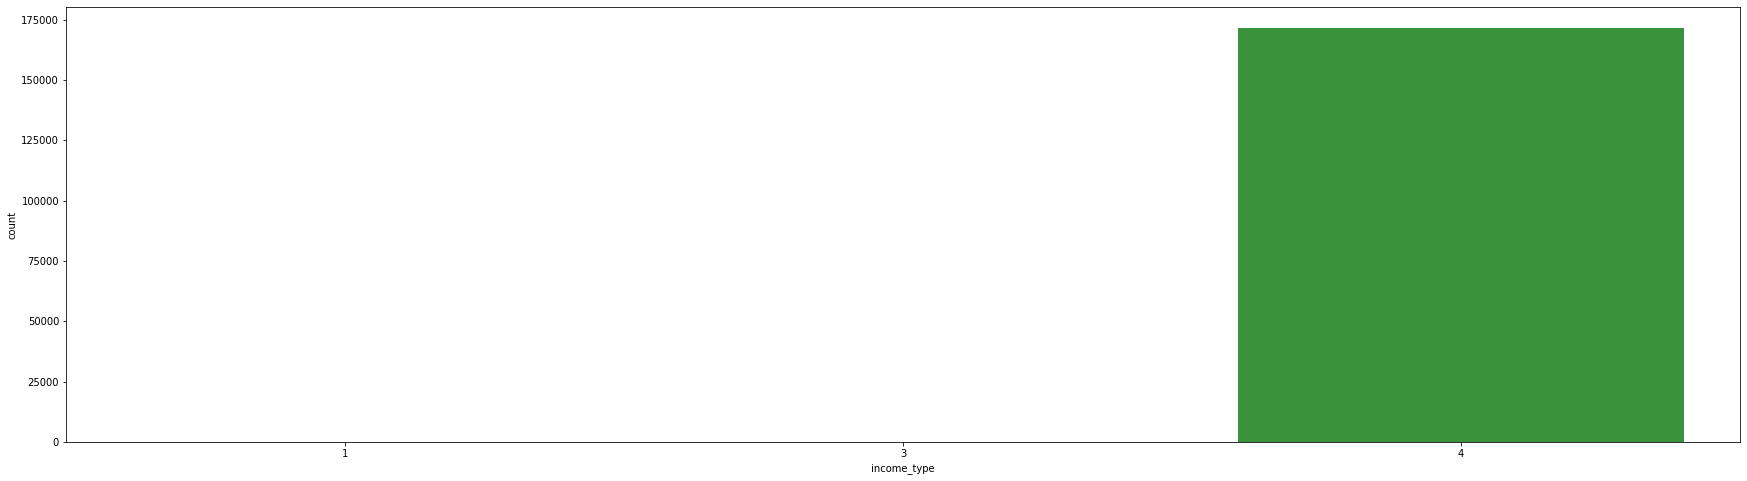

In [33]:
respec2 = respec[respec['company_enter_month'].isnull()]

plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec2)
plt.show()

In [34]:
respec2 = respec.dropna(subset = ['company_enter_month'])

In [44]:
# respec2 > 1222456 
# respec3 > 921469  
# respec4 > 300987  

In [48]:
respec3 = respec2[respec2['company_enter_month'] < 10000000]
respec3['company_enter_month'] = respec2['company_enter_month'] / 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
respec4 = respec2[respec2['company_enter_month'] > 10000000]
respec4['company_enter_month'] = respec2['company_enter_month'] / 10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
respec5 = pd.merge(respec3, respec4,left_on = 'application_id', right_on = 'application_id', how = 'outer')

In [53]:
respec5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921469 entries, 0 to 921468
Data columns (total 33 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   application_id                         921469 non-null  int64  
 1   company_enter_month_x                  921469 non-null  float64
 2   credit_score_x                         848538 non-null  float64
 3   desired_amount_x                       921469 non-null  float64
 4   employment_type_x                      921469 non-null  object 
 5   existing_loan_amt_x                    713021 non-null  float64
 6   existing_loan_cnt_x                    785935 non-null  float64
 7   gender_x                               921469 non-null  float64
 8   houseown_type_x                        921469 non-null  object 
 9   income_type_x                          921469 non-null  int64  
 10  insert_time_x                          921469 non-null  

In [ ]:
respec2.loc[(respec2['company_enter_month'] < 10000000)]

In [42]:
respec2[respec2['company_enter_month'] < 10000000 ? respec2['company_enter_month'] / 100 : respec2['company_enter_month'] / 10000 ]

SyntaxError: ignored

In [37]:
respec2['company_enter_month'] = respec2[(respec2['company_enter_month'] < 10000000) * 100]
respec2

KeyError: ignored

In [38]:
respec3 = respec2['company_enter_month'] < 10000000
respec3['company_enter_month'] = respec2[respec2['company_enter_month'] * 100]

ValueError: ignored

In [ ]:
respec2['company_enter_month'] = respec2['company_enter_month'] / 10000

In [ ]:
respec2['outlier'] = respec2['birth_year'] - respec2['company_enter_month']

In [ ]:
respec2 = respec2.drop(respec2.loc[respec['outlier']<20])

In [ ]:
#전문직의 평균 경력은 7년 이므로 결측치를 7로 채워줌
respec2 = respec[respec['income_type'] == 4]
respec2['company_enter_month'].mean()

In [ ]:
#respec['career'] = respec['gender'].fillna(0)

In [ ]:
respec.isnull().sum()

# 데이터 합치기

In [ ]:
#join1 = pd.merge(user_spec, loan_result,left_on = 'application_id', right_on = 'application_id', how = 'right')

In [ ]:
#join2 = pd.merge(join1, relog,left_on = 'user_id', right_on = 'user_id', how = 'left')